### SVM (Support Vector Machine)
>SVC

>SVR

#Objective: Cluster similar data points in such a manner that a decision boundary (hyper plane) can be used to separate classes.

Types of SVM

>Linear SVM

>Non-Linear SVM


In [73]:
import pandas as pd
from sklearn.svm import SVC

In [74]:
df=pd.read_csv("G:/dataset/classification/fruits.csv")
X=df.iloc[:,:-1].values
y=df.iloc[:,-1].values
model=SVC(kernel='linear')
model.fit(X,y)

SVC(kernel='linear')

In [75]:
from sklearn.model_selection import cross_val_score
cross_val_score(model,X,y,cv=5).mean()

0.96

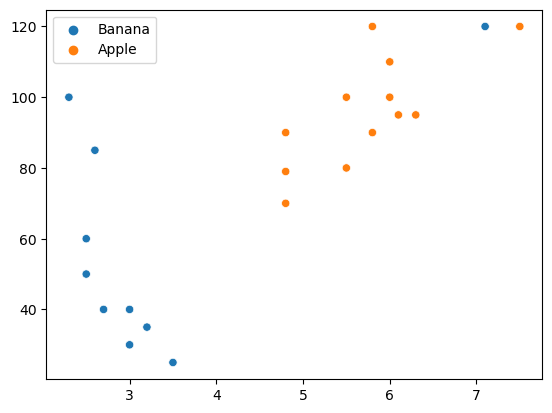

In [76]:
import matplotlib.pyplot as plt
import seaborn as sn
sn.scatterplot(x=X[:,0],y=X[:,1],hue=y)
plt.show()

In [77]:
df=pd.read_csv('G:/dataset/classification/fruits_svc.csv')
X=df.iloc[:,:-1].values
y=df.iloc[:,-1]
model=SVC(kernel='linear')
model.fit(X,y)
cross_val_score(model,X,y,cv=5).mean()

0.6900000000000001

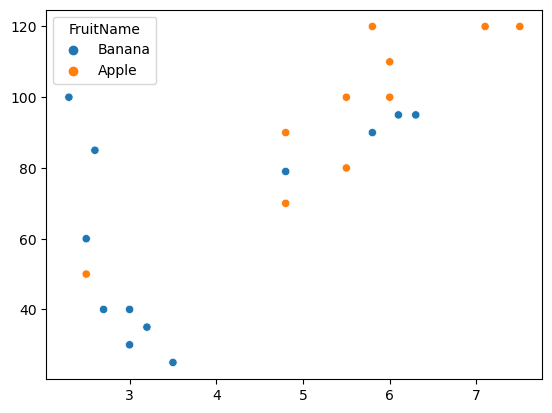

In [78]:
sn.scatterplot(x=X[:,0],y=X[:,1],hue=y)
plt.show()

In [79]:
model=SVC(kernel='poly')
model.fit(X,y)
cross_val_score(model,X,y,cv=5).mean()

0.6799999999999999

In [80]:
model=SVC(kernel='poly',degree=7)
model.fit(X,y)
cross_val_score(model,X,y,cv=5).mean()

0.73

In [81]:
model=SVC(kernel='rbf',gamma=.5)
model.fit(X,y)
cross_val_score(model,X,y,cv=5).mean()

0.73

In [82]:
model=SVC(kernel='linear',degree=7)
model.fit(X,y)
cross_val_score(model,X,y,cv=5).mean()

0.6900000000000001

In [83]:
from sklearn.preprocessing import StandardScaler
df=pd.read_csv('G:/dataset/classification/fruits_svc.csv')
X=df.iloc[:,:-1].values
y=df.iloc[:,-1]
sc=StandardScaler()
X=sc.fit_transform(X)
model=SVC(kernel='linear')
cross_val_score(model,X,y,cv=5).mean()

0.6900000000000001

In [84]:
df=pd.read_csv('G:/dataset/classification/fruits_svc.csv')
X=df.iloc[:,:-1].values
y=df.iloc[:,-1]
sc=StandardScaler()
X=sc.fit_transform(X)
model=SVC(kernel='poly')
cross_val_score(model,X,y,cv=5).mean()

0.73

In [85]:
df=pd.read_csv('G:/dataset/classification/fruits_svc.csv')
X=df.iloc[:,:-1].values
y=df.iloc[:,-1]
sc=StandardScaler()
X=sc.fit_transform(X)
model=SVC(kernel='rbf')
cross_val_score(model,X,y,cv=5).mean()

0.77

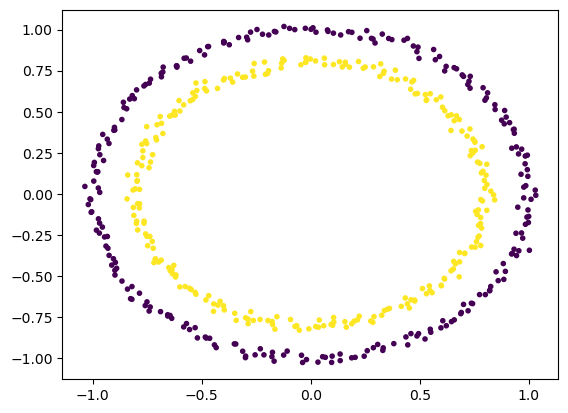

In [86]:
import numpy as np
from sklearn.datasets import make_circles
from mpl_toolkits.mplot3d import Axes3D

X,y=make_circles(n_samples=500,noise=.02)
plt.scatter(X[:,0],X[:,1],c=y,marker='.')
plt.show()

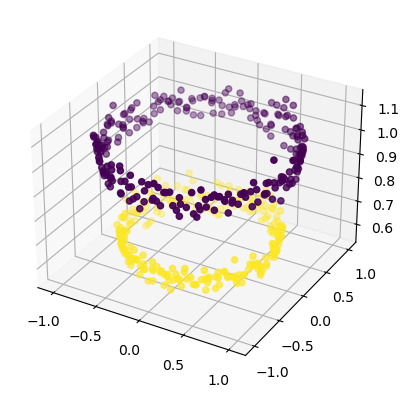

In [87]:
x1=X[:,0]
x2=X[:,1]
x3=(x1**2 + x2**2)
fig=plt.figure()
axes=fig.add_subplot(projection='3d')
axes.scatter(x1,x2,x3,c=y)
plt.show()

In [88]:
sample=[2.5,70]
sample=sc.transform([sample])
model=SVC(kernel='rbf',probability=True)
model.fit(X,y)
model.predict(sample)

array([0], dtype=int64)

In [89]:
model.predict_proba(sample)

array([[9.9999990e-01, 1.0000001e-07]])

In [119]:
# With linear kernel and binary classification
df=pd.read_csv('G:/dataset/classification/fruits.csv')
X=df.iloc[:,:-1].values
y=df.iloc[:,-1].values
model=SVC(kernel='linear')
model.fit(X,y)

SVC(kernel='linear')

In [120]:
coef=model.coef_
inter=model.intercept_
print('Coef:- ',coef,sep='')
print('Intercept:- ',inter,sep='')

Coef:- [[-0.87956593 -0.01319065]]
Intercept:- [4.40849056]


In [121]:
sample=[[3,70],[5,90]]
model.decision_function(sample)

array([ 0.84644742, -1.1764974 ])

In [122]:
df.FruitName=df.FruitName.map({'Apple':-1,'Banana':1})

In [123]:
model.predict(sample)

array(['Banana', 'Apple'], dtype=object)

In [124]:
sample=[[3,70],[5,90]]
d=coef[0][0]*3+coef[0][1]*70+inter
print(d)
d=coef[0][0]*5+coef[0][1]*90+inter
print(d)

[0.84644742]
[-1.1764974]


In [125]:
gm=.1
model=SVC(kernel='rbf',gamma=gm)
model.fit(X,y)

SVC(gamma=0.1)

In [126]:
print(model.n_support_)
print(model.support_vectors_)

[11 10]
[[  6.  100. ]
 [  5.5  80. ]
 [  4.8  70. ]
 [  4.8  79. ]
 [  5.8 120. ]
 [  6.  110. ]
 [  6.3  95. ]
 [  5.5 100. ]
 [  7.5 120. ]
 [  4.8  90. ]
 [  5.8  90. ]
 [  3.   30. ]
 [  3.2  35. ]
 [  7.1 120. ]
 [  2.5  60. ]
 [  2.3 100. ]
 [  2.6  85. ]
 [  3.   40. ]
 [  3.5  25. ]
 [  2.5  50. ]
 [  2.7  40. ]]


In [127]:
import numpy as np
sample=[3,70]
dc=model.dual_coef_
sqr_eucl_dist=np.square(model.support_vectors_-sample).sum(axis=1)
# print(sqr_eucl_dist)
kernal=np.exp(-gm*sqr_eucl_dist)
# print(kernal)
kernal_dc=dc*kernal
d=kernal_dc.sum()+model.intercept_
print(d)

[-0.68220774]


In [128]:
from sklearn.datasets import load_iris
from sklearn.svm import SVC
iris=load_iris()
X=iris.data
y=iris.target
model=SVC(kernel='linear',decision_function_shape='ovr')
model.fit(X,y)

SVC(kernel='linear')

In [129]:
coef=model.coef_
inter=model.intercept_
print('Coef:- ',coef,sep='')
print('Intercept:- ',inter,sep='')

Coef:- [[-0.04625854  0.5211828  -1.00304462 -0.46412978]
 [-0.00722313  0.17894121 -0.53836459 -0.29239263]
 [ 0.59549776  0.9739003  -2.03099958 -2.00630267]]
Intercept:- [1.4528445  1.50771313 6.78097119]


In [130]:
sample=[3.3,1.3,5.7,.7]
model.decision_function([sample])

array([[-0.28299128,  1.17426921,  2.27301   ]])

In [131]:
model.predict([sample])

array([2])

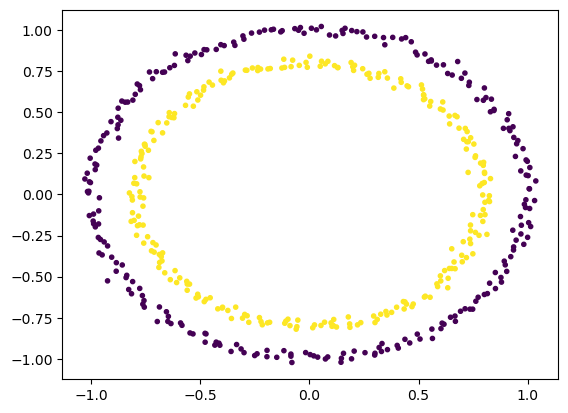

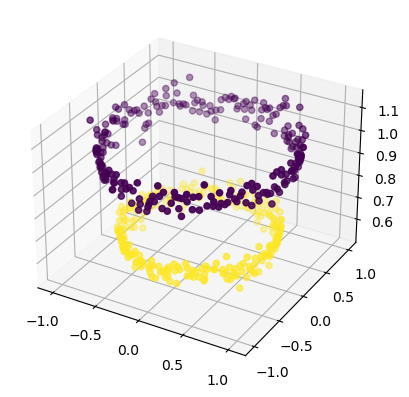

Linear_Kernal 0.43200000000000005
RBF_Kernal 1.0
Poly_Kernal 1.0


In [150]:
## Non_Linear_3d_plot

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from mpl_toolkits.mplot3d import Axes3D
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

x,y=make_circles(n_samples=500,noise=0.02,random_state=11)
plt.scatter(x[:,0],x[:,1],c=y,marker='.')
plt.show()

x1=x[:,0]
x2=x[:,1]
x3=(x1**2 + x2**2)
fig= plt.figure()
axes=fig.add_subplot(projection='3d')
axes.scatter(x1,x2,x3,c=y)
plt.show()

model=SVC(kernel='linear')
print('Linear_Kernal',cross_val_score(model,x,y,cv=5).mean())

gm=1
model=SVC(kernel='rbf',gamma=gm)
print('RBF_Kernal',cross_val_score(model,x,y,cv=5).mean())

d=2
model=SVC(kernel='poly',degree=d)
print('Poly_Kernal',cross_val_score(model,x,y,cv=5).mean())

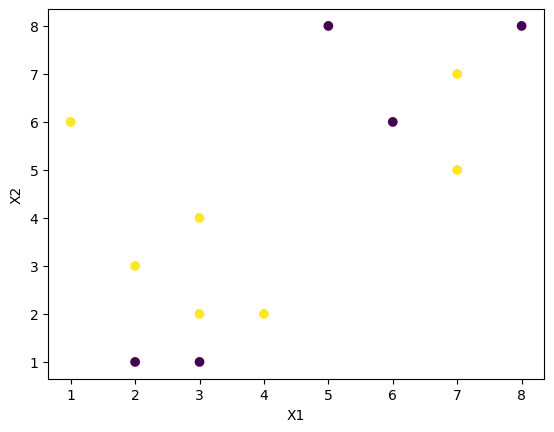

[0.30858283]
[1]
[0.30858283]
1
[1.18645119]
[1]
[1.18645119]
1


In [149]:
## Non_linear_SVM

import  numpy as np
import matplotlib.pyplot as plt
x1=[1,2,5,4,3,8,3,2,6,3,7,7]
x2 =[6,3,8,2,4,8,2,1,6,1,7,5]
y=[1,1,0,1,1,0,1,0,0,0,1,1]
plt.scatter(x1,x2,c=y)
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
import numpy as np
X=np.array([[1,6],[2,3],[5,8],[4,2],[3,4],[8,8],[3,2],[2,1],[6,6],[3,1],[7,7],[7,5]])

lnr_svc=SVC(kernel='linear')
cross_val_score(lnr_svc,X,y,cv=4).mean()

g=1
rbf_svc=SVC(kernel='rbf',gamma=g)
cross_val_score(rbf_svc,X,y,cv=4).mean()

clf=SVC(kernel='rbf',gamma=g)
clf.fit(X,y)

test=[6,1]
print(clf.decision_function([test]))#internally use hyperplane equation to give y
print (clf.predict([test]))#it returns class of given features

import numpy as np
dc=clf.dual_coef_[0]
sqr_eucl_dist=np.square(clf.support_vectors_-test).sum(axis=1)
kernal=np.exp(-g*sqr_eucl_dist)
kernal_dc=dc*kernal
d=kernal_dc.sum()+clf.intercept_
print(d)
if(d<0):
    print(0)
else:
    print(1)

d=2
poly=SVC(kernel='poly',degree=d,gamma=g,coef0=1)
cross_val_score(poly,X,y,cv=4).mean()

poly.fit(X,y)
print(poly.decision_function([test]))
print(poly.predict([test]))

k=g*(poly.support_vectors_@test+poly.coef0)**d
d=np.sum(poly.dual_coef_*k)+poly.intercept_
print(d)
if(d<0):
    print(0)
else:
    print(1)